# Corner Reflector analysis

In this Jupyter Notebook we will run some analysis on SAR images to determine the signal response of a radar corner reflector

Get a list of image files in the data directory:

In [1]:
import glob

files = []
for file in glob.glob("data/*.tif"):
    files.append(file)

files.sort()
print(files)

['data/20180726_VV.tif', 'data/20180807_VV.tif', 'data/20180819_VV.tif', 'data/20180831_VV.tif', 'data/20180912_VV.tif', 'data/20180924_VV.tif', 'data/20181006_VV.tif', 'data/20181018_VV.tif', 'data/20181030_VV.tif']


Lets read a tiff image with rasterio

In [2]:
import rasterio as rio

# open the 5th file in the time series
src = rio.open(files[4])

data = src.read()
data.shape

/home/547/mcg547/.virtualenvs/coral/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(1, 200, 200)

# Plotting with Matplotlib

We can make a plot our SAR image using the Matplotlib package

<Figure size 432x288 with 0 Axes>

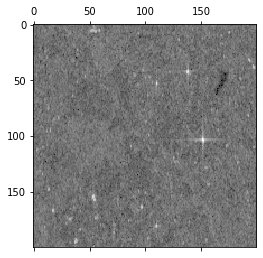

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# remove third dimension of numpy array
d = data.squeeze()

# convert intensity values to decibels
db = 10*np.log10(d)

# set the colour map for the plot
cmap = plt.set_cmap('gist_gray')

# plot the matrix (array)
plt.matshow(db, cmap)

## Run the CoRAL algorithms

Lets first define the position of the corner reflector in range and azimuth coordinates

In [4]:
# Define a dictionary of site names and CR positions
#       site name        range   azimuth
sites = {'SERF' : np.array([87, 110])}

print(sites)
print(sites['SERF'])

{'SERF': array([ 87, 110])}
[ 87 110]


Define some other parameters for the CoRAL analysis

In [5]:
#cropped image size
sub_im = 51

# define target_window size
targ_win_sz = 5

# define clutter window size
clt_win_sz = 9

print(sub_im, targ_win_sz, clt_win_sz)

51 5 9




Now lets pass this information to the CoRAL package. CoRAL implements the algorithms described by equations 7-9 of [Garthwaite 2017](https://www.mdpi.com/2072-4292/9/7/648/htm)

In [6]:
# loop is a function contained in the CoRAL module
from coral.corner_reflector import loop

avgI, rcs, scr, Avg_clt, t = loop(files, sub_im, sites['SERF'], targ_win_sz, clt_win_sz)

print('The Radar Cross Section is: ',rcs)
print('The Signal to Clutter ratio is: ',scr)

Reading tiff image: data/20180726_VV.tif
Reading tiff image: data/20180807_VV.tif
Reading tiff image: data/20180819_VV.tif
Reading tiff image: data/20180831_VV.tif
Reading tiff image: data/20180912_VV.tif
Reading tiff image: data/20180924_VV.tif
Reading tiff image: data/20181006_VV.tif
Reading tiff image: data/20181018_VV.tif
Reading tiff image: data/20181030_VV.tif
The Radar Cross Section is:  [0.0, 9.13398793348449, 36.96763370322139, 35.4903630503769, 31.025217706683183, 32.0952212099142, 26.987680915413534, 19.669169721189334, 23.841155980889162]
The Signal to Clutter ratio is:  [0.0, 0.0, 24.693294059960287, 23.304230572049235, 18.795652426872785, 21.403966695016962, 14.075626848845529, 7.055242854988365, 11.19621832733139]


/home/547/mcg547/.virtualenvs/coral/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<Figure size 432x288 with 0 Axes>

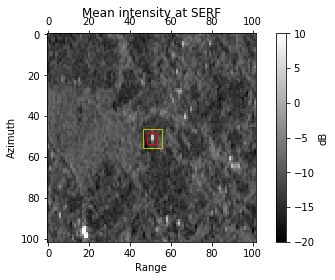

In [7]:
# define the CR position as the centre of the image
cr_pos = np.array([sub_im, sub_im])

# some plotting scripts are included in the plot.py module of CoRAL
from coral.plot import plot_mean_intensity

# Plot the mean intensity image
plot_mean_intensity(avgI, cr_pos, targ_win_sz, clt_win_sz, 'SERF')

We will use the python 'datetime' module to handle time objects. Lets set the start and end times for our time series plots

In [8]:
from datetime import datetime

start = datetime(2018, 7, 1)
end = datetime(2018, 11, 1)

print(start,end)

2018-07-01 00:00:00 2018-11-01 00:00:00


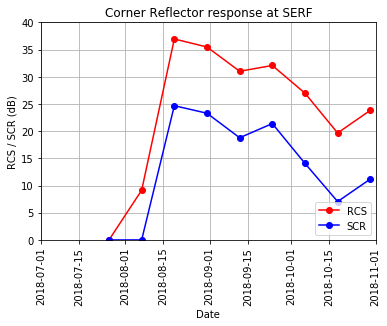

In [9]:
# Plot RCS and SCR time series
from coral.plot import plot_rcs_scr

plot_rcs_scr(t, rcs, scr, start, end, 'SERF')

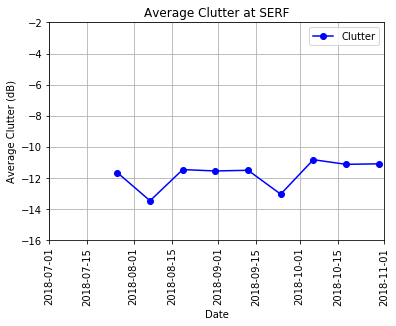

In [10]:
# Plot average clutter time series
from coral.plot import plot_clutter

plot_clutter(t, Avg_clt, start, end, 'SERF')

## Exercises

1) First run the code snippets in this Jupyter Notebook to get a feel for what the commands are doing. These will use the SAR data included within the CoRAL package.

2) Modify the notebook code to read in a different SAR dataset and re-run the different steps. You will need to define the pixel range and azimuth for the corner reflector in these new images.

## Questions

Answer the following questions and qualify your answer with code and output.

1) What is the Radar Cross Section (RCS) of the new corner reflector. *From the data*, determine when the corner reflector was installed.

2) What does the Clutter time series tell you about the change of environmental conditions on site? Any thoughts on what might have caused these changes?

3) How is the Signal to Clutter ratio (SCR) affected by varying the sample window sizes used in the CoRAL analysis?

4) Find another nearby bright target in the SAR image and run a CoRAL analysis. How does this target compare to the corner reflector (in terms of RCS and SCR)?